# Allen Neuropixel (Ecephys) Dataset Loading

In [1]:
import os
from pathlib import Path

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.ecephys_session import (
    EcephysSession, 
    removed_unused_stimulus_presentation_columns
)
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# Show all columns when printing data
pd.set_option('display.max_columns', None)

In [3]:
# Specify home path and a .json file
# HOME = Path().cwd()
HOME = Path('/media/internal/data/neuropixel')
manifest_path = HOME / 'data' / 'Ecephy' / "manifest.json"

In [4]:
# Project-loading object that fetches from Allen's public API (warehouse)
# uses .json file to point to a cache directory
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

Try to find the number of sessions and probes and channels and units within each session. 

In [6]:
table = cache.get_session_table()
table.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [ ]:
# def load_npx_session(session_num)

In [21]:
table.groupby(["specimen_id", "session_type", "full_genotype", "probe_count"], as_index=False)["unit_count", "channel_count"].sum()

C:\Users\shari\miniconda3\envs\neuro\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,specimen_id,session_type,full_genotype,probe_count,unit_count,channel_count
0,699733581,brain_observatory_1.1,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,6,884,2219
1,703279284,brain_observatory_1.1,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,6,755,2214
2,707296982,brain_observatory_1.1,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,6,444,2229
3,716813543,brain_observatory_1.1,wt/wt,6,625,2221
4,717038288,brain_observatory_1.1,wt/wt,5,824,1847
5,718643567,brain_observatory_1.1,wt/wt,6,568,2218
6,719817805,brain_observatory_1.1,wt/wt,6,659,2226
7,719828690,brain_observatory_1.1,wt/wt,6,502,2220
8,722882755,brain_observatory_1.1,wt/wt,6,553,2225
9,723627604,brain_observatory_1.1,wt/wt,6,893,2219


In [18]:
# Can track probes across sessions, which is great for drift analysis
probes = cache.get_probes()
probes.head()

,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,unit_count,channel_count,ecephys_structure_acronyms
id,,,,,,,,,
729445648,719161530,1249.998642,probeA,3a,29999.967418,True,87,374,"[APN, LP, MB, DG, CA1, VISam, nan]"
729445650,719161530,1249.996620,probeB,3a,29999.918880,True,202,368,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan]"
729445652,719161530,1249.999897,probeC,3a,29999.997521,True,207,373,"[APN, NOT, MB, DG, SUB, VISp, nan]"
729445654,719161530,1249.996707,probeD,3a,29999.920963,True,93,358,"[grey, VL, CA3, CA2, CA1, VISl, nan]"
729445656,719161530,1249.999979,probeE,3a,29999.999500,True,138,370,"[PO, VPM, TH, LP, LGd, CA3, DG, CA1, VISal, nan]"


In [24]:
probes.ecephys_session_id.unique()

array([719161530, 732592105, 754312389, 744228101, 750332458, 739448407,
       751348571, 737581020, 721123822, 754829445, 756029989, 755434585,
       746083955, 762120172, 761418226, 762602078, 742951821, 757216464,
       759883607, 750749662, 760693773, 757970808, 743475441, 758798717,
       767871931, 763673393, 768515987, 766640955, 771160300, 771990200,
       787025148, 781842082, 774875821, 778240327, 786091066, 778998620,
       779839471, 773418906, 798911424, 789848216, 791319847, 793224716,
       799864342, 797828357, 760345702, 715093703, 794812542, 819186360,
       821695405, 829720705, 831882777, 816200189, 819701982, 835479236,
       840012044, 839068429, 839557629, 847657808], dtype=int64)

In [20]:
len(probes.ecephys_session_id.unique())

58

It looks like we have 58 sessions in total: 30 for observatory 1.1 and 28 for functional connectivity. However, each session is for one single animal! 

There are 6 neuropixel probes across sessions. \
**TODO**: Check if these are present in both sessions.

In [13]:
# Overall properties of the project
print(f"stimulus sets: {cache.get_all_session_types()}")
print(f"genotypes: {cache.get_all_full_genotypes()}")
print(f"structures: {cache.get_structure_acronyms()}")

stimulus sets: ['brain_observatory_1.1', 'functional_connectivity']
genotypes: ['Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt', 'Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt', 'wt/wt', 'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt']
structures: ['APN', 'LP', 'MB', 'DG', 'CA1', 'VISrl', nan, 'TH', 'LGd', 'CA3', 'VIS', 'CA2', 'ProS', 'VISp', 'POL', 'VISpm', 'PPT', 'OP', 'NOT', 'HPF', 'SUB', 'VISam', 'ZI', 'LGv', 'VISal', 'VISl', 'SGN', 'SCig', 'MGm', 'MGv', 'VPM', 'grey', 'Eth', 'VPL', 'IGL', 'PP', 'PIL', 'PO', 'VISmma', 'POST', 'SCop', 'SCsg', 'SCzo', 'COApm', 'OLF', 'BMAa', 'SCiw', 'COAa', 'IntG', 'MGd', 'MRN', 'LD', 'VISmmp', 'CP', 'VISli', 'PRE', 'RPF', 'LT', 'PF', 'PoT', 'VL', 'RT']


In [26]:
cache.get_unit_analysis_metrics_by_session_type('brain_observatory_1.1').head()

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cumulative_drift,d_prime,waveform_duration,ecephys_channel_id,firing_rate,waveform_halfwidth,isi_violations,isolation_distance,L_ratio,max_drift,nn_hit_rate,nn_miss_rate,presence_ratio,waveform_recovery_slope,waveform_repolarization_slope,silhouette_score,snr,waveform_spread,waveform_velocity_above,waveform_velocity_below,ecephys_probe_id,local_index,probe_horizontal_position,probe_vertical_position,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,ecephys_structure_id,ecephys_structure_acronym,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,date_of_acquisition,published_at,specimen_id,session_type,age_in_days,sex,genotype,c50_dg,area_rf,fano_dg,fano_fl,fano_ns,fano_rf,fano_sg,f1_f0_dg,g_dsi_dg,g_osi_dg,g_osi_sg,width_rf,height_rf,azimuth_rf,mod_idx_dg,p_value_rf,pref_sf_sg,pref_tf_dg,run_mod_dg,run_mod_fl,run_mod_ns,run_mod_rf,run_mod_sg,pref_ori_dg,pref_ori_sg,run_pval_dg,run_pval_fl,run_pval_ns,run_pval_rf,run_pval_sg,elevation_rf,on_screen_rf,pref_image_ns,pref_phase_sg,firing_rate_dg,firing_rate_fl,firing_rate_ns,firing_rate_rf,firing_rate_sg,on_off_ratio_fl,time_to_peak_fl,time_to_peak_ns,time_to_peak_rf,time_to_peak_sg,pref_sf_multi_sg,pref_tf_multi_dg,sustained_idx_fl,pref_ori_multi_dg,pref_ori_multi_sg,pref_phase_multi_sg,image_selectivity_ns,pref_images_multi_ns,lifetime_sparseness_dg,lifetime_sparseness_fl,lifetime_sparseness_ns,lifetime_sparseness_rf,lifetime_sparseness_sg
ecephys_unit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
915956282,0.611816,164.878740,0.072728,309.71,3.910873,0.535678,850229419,6.519432,0.164824,0.104910,30.546900,0.013865,27.10,0.898126,0.001599,0.99,-0.087545,0.480915,0.102369,1.911839,30.0,0.000000,NaN,733744647,3,27,40,NaN,NaN,NaN,8.0,grey,732592105,1249.996475,probeB,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,NaN,400.0,4.583142,0.704265,2.753659,0.965027,2.042857,0.361792,0.084691,0.060583,0.024688,17.440168,35.443383,15.000,0.221350,0.0,0.02,15.0,0.029968,-0.217641,0.436242,0.260073,0.565060,315.0,30.0,0.887976,0.318558,0.015746,0.576185,0.001492,-15.000,False,4953,0.00,6.664107,5.275624,7.623793,4.707261,5.901067,NaN,0.0495,0.0705,0.1105,0.0595,False,False,0.049428,False,False,False,0.286831,False,0.209965,0.563430,0.070184,0.555840,0.094790
915956340,0.439372,247.254345,0.000881,160.24,5.519024,0.563149,850229419,9.660554,0.206030,0.006825,59.613182,0.000410,7.79,0.987654,0.000903,0.99,-0.104196,0.704522,0.197458,3.357908,30.0,0.000000,NaN,733744647,3,27,40,NaN,NaN,NaN,8.0,grey,732592105,1249.996475,probeB,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,NaN,600.0,13.657938,1.428046,3.537971,4.437255,4.910479,0.419164,0.094477,0.145318,0.075828,762.431540,109.498052,25.000,0.209387,0.0,0.02,8.0,0.355659,0.207353,0.397513,-0.054545,0.651261,270.0,90.0,0.209249,0.435825,0.028048,0.931928,0.000757,-25.000,False,5021,0.75,10.107708,12.283146,10.522178,7.311442,8.214466,NaN,0.0965,0.0925,0.0215,0.1225,False,False,0.116466,False,False,False,0.275932,False,0.062212,0.034415,0.067967,0.180490,0.054469
915956345,0.500520,251.275830,0.001703,129.36,3.559911,0.521943,850229419,12.698430,0.192295,0.044936,47.805714,0.008281,11.56,0.930000,0.004956,0.99,-0.153127,0.781296,0.138827,3.362198,30.0,0.343384,NaN,733744647,3,27,40,NaN,NaN,NaN,8.0,grey,732592105,1249.996475,probeB,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,NaN,600.0,4.236128,1.643568,1.817460,0.990123,3.421208,0.268001,0.038387,0.040152,0.085168,265.867229,29.494932,40.000,0.123119,0.0,0.04,8.0,0.222727,0.006618,-0.096483,-0.081081,0.431100,225.0,60.0,0.178474,0.982081,0.509995,0.545245,0.020251,-25.000,False,5010,0.00,11.973721,7.860148,15.618365,12.267608,10.896224,N

In [11]:
# Load one session data to see what's what
session_id = 791319847
session = cache.get_session_data(session_id)

In [29]:
session.metadata

{'specimen_name': 'Vip-IRES-Cre;Ai32-417678',
 'session_type': 'brain_observatory_1.1',
 'full_genotype': 'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'sex': 'M',
 'age_in_days': 116.0,
 'rig_equipment_name': 'NP.1',
 'num_units': 555,
 'num_channels': 2229,
 'num_probes': 6,
 'num_stimulus_presentations': 70931,
 'session_start_time': datetime.datetime(2019, 1, 8, 13, 55, 1, tzinfo=tzoffset(None, -28800)),
 'ecephys_session_id': 791319847,
 'structure_acronyms': ['VISpm',
  nan,
  'LP',
  'TH',
  'DG',
  'CA1',
  'CA3',
  'CA2',
  'VISl',
  'ZI',
  'LGv',
  'VISal',
  'APN',
  'POL',
  'VISrl',
  'VISam',
  'LGd',
  'ProS',
  'SUB',
  'VISp'],
 'stimulus_names': ['spontaneous',
  'gabors',
  'flashes',
  'drifting_gratings',
  'natural_movie_three',
  'natural_movie_one',
  'static_gratings',
  'natural_scenes',
  'drifting_gratings_contrast']}

In [30]:
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

In [32]:
session.__dir__()

['api',
 'ecephys_session_id',
 'session_start_time',
 'running_speed',
 'mean_waveforms',
 '_spike_times',
 'optogenetic_stimulation_epochs',
 'spike_amplitudes',
 'probes',
 'channels',
 '_stimulus_presentations',
 'inter_presentation_intervals',
 'invalid_times',
 '_units',
 '_rig_metadata',
 '_metadata',
 '_unmerged_units',
 '_stimulus_conditions',
 '__module__',
 '__doc__',
 'DETAILED_STIMULUS_PARAMETERS',
 'num_units',
 'num_probes',
 'num_channels',
 'num_stimulus_presentations',
 'stimulus_names',
 'stimulus_conditions',
 'rig_geometry_data',
 'rig_equipment_name',
 'specimen_name',
 'age_in_days',
 'sex',
 'full_genotype',
 'session_type',
 'units',
 'structure_acronyms',
 'structurewise_unit_counts',
 'metadata',
 'stimulus_presentations',
 'spike_times',
 '__init__',
 'get_current_source_density',
 'get_lfp',
 '_get_valid_time_points',
 '_filter_invalid_times_by_tags',
 'get_inter_presentation_intervals_for_stimulus',
 'get_stimulus_table',
 'get_stimulus_epochs',
 'get_inva

In [62]:
session.stimulus_conditions

,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
stimulus_condition_id,,,,,,,,,,,,,,,
0,null,null,null,null,null,null,null,null,null,spontaneous,null,null,null,null,null
1,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,10.0,-40.0,"[1.0, 1.0, 1.0]"
2,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,-10.0,0.0,"[1.0, 1.0, 1.0]"
3,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,-40.0,20.0,"[1.0, 1.0, 1.0]"
4,null,0.8,null,circle,1.0,90.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,-40.0,-10.0,"[1.0, 1.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,null,0.2,null,None,1.0,0.0,"[19258.96666667, 19258.96666667]","[250.0, 250.0]",0.04,drifting_gratings_contrast,2.0,deg,null,null,"[1.0, 1.0, 1.0]"
5059,null,0.01,null,None,1.0,0.0,"[19258.96666667, 19258.96666667]","[250.0, 250.0]",0.04,drifting_gratings_contrast,2.0,deg,null,null,"[1.0, 1.0, 1.0]"
5060,null,0.35,null,None,1.0,90.0,"[19258.96666667, 19258.96666667]","[250.0, 250.0]",0.04,drifting_gratings_contrast,2.0,deg,null,null,"[1.0, 1.0, 1.0]"


In [23]:
# how many units have signal to noise ratios that are greater than 4?
print(f'{session.units.shape[0]} units total')
units_with_very_high_snr = session.units[session.units['snr'] > 4]
print(f'{units_with_very_high_snr.shape[0]} units have snr > 4')

555 units total
47 units have snr > 4


In [27]:
session.stimulus_names

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes',
 'drifting_gratings_contrast']

In [52]:
# Filter basd on only gabors
gabor_idx = session.get_stimulus_table(['gabors']).index.values
visp_idx = session.units[session.units["ecephys_structure_acronym"] == 'VISp'].index.values

time_step = 0.03
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

gabor_visp_counts = session.presentationwise_spike_counts(
    stimulus_presentation_ids=gabor_idx,  
    bin_edges=time_bins,
    unit_ids=visp_idx
)

gabor_visp_counts.coords

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 1 ... 3645
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.085 ... 0.485
  * unit_id                          (unit_id) int64 951061537 ... 951062679

In [53]:
gabor_visp_counts

<xarray.DataArray 'spike_counts' (stimulus_presentation_id: 3645, time_relative_to_stimulus_onset: 20, unit_id: 93)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 0]],

       [[2, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        ...,
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 1, 1]],

       ...,

       [[0, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 1 ... 3645
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.085 ... 0.485
  * unit_id                          (unit_id) int64 951061537 ... 951062679

C:\Users\shari\miniconda3\envs\neuro\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


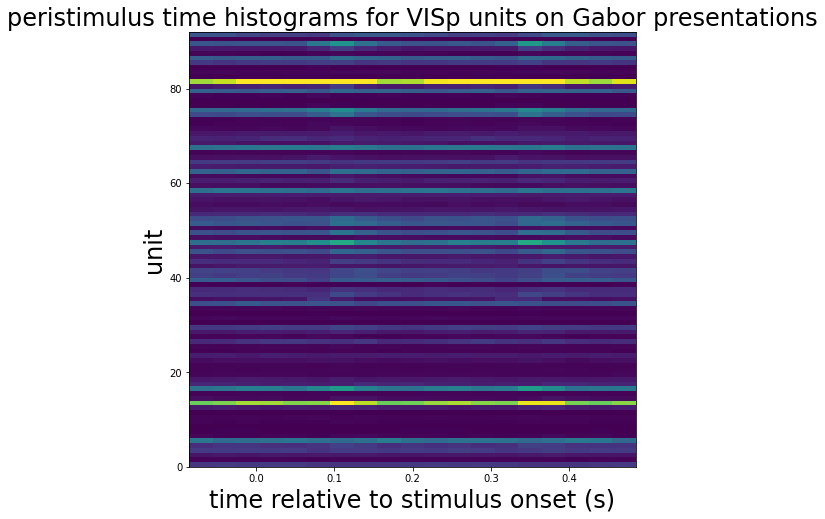

In [64]:
mean_histograms = gabor_visp_counts.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histoagrams.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on Gabor presentations", fontsize=24)

plt.show()

In [56]:
# get spike times from the first block of drifting gratings presentations 
gabor_visp_spikes = session.presentationwise_spike_times(
    stimulus_presentation_ids=gabor_idx,
    unit_ids=visp_idx
)

gabor_visp_spikes.head()

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
89.232982,1,951061727,0.001720
89.233449,1,951062203,0.002186
89.233682,1,951062505,0.002420
89.234149,1,951062388,0.002886
89.236182,1,951062307,0.004920


In [59]:
gabor_visp_spikes["stimulus_presentation_id"].unique() 

array([   1,    2,    3, ..., 3643, 3644, 3645])

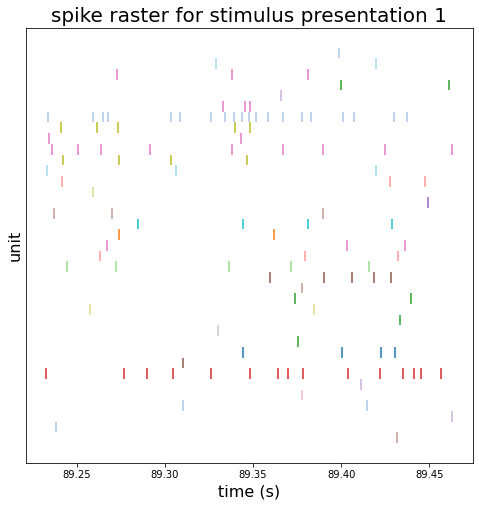

color                                              null
contrast                                            0.8
frame                                              null
orientation                                        45.0
phase                    [3644.93333333, 3644.93333333]
size                                       [20.0, 20.0]
spatial_frequency                                  0.08
start_time                                    89.231262
stimulus_block                                      0.0
stimulus_name                                    gabors
stop_time                                     89.464781
temporal_frequency                                  4.0
x_position                                         10.0
y_position                                        -40.0
duration                                       0.233519
stimulus_condition_id                                 1
Name: 1, dtype: object

In [60]:
stim_id = gabor_visp_spikes['stimulus_presentation_id'].values[5]
plot_times = gabor_visp_spikes[gabor_visp_spikes['stimulus_presentation_id'] == stim_id]

fig = raster_plot(plot_times, title=f'spike raster for stimulus presentation {stim_id}')
plt.show()

# also print out this presentation
session.stimulus_presentations.loc[stim_id]

In [63]:
stats = session.conditionwise_spike_statistics(
    stimulus_presentation_ids=gabor_idx,
    unit_ids=visp_idx
)

# display the parameters associated with each condition
stats = pd.merge(stats, session.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

stats.head()

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951061537,1,32,15,2.133333,1.355764,0.350057,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,10.0,-40.0,"[1.0, 1.0, 1.0]"
951061549,1,16,15,1.066667,1.099784,0.283963,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,10.0,-40.0,"[1.0, 1.0, 1.0]"
951061556,1,46,15,3.066667,3.432339,0.886226,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,10.0,-40.0,"[1.0, 1.0, 1.0]"
951061568,1,1,15,0.066667,0.258199,0.066667,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,10.0,-40.0,"[1.0, 1.0, 1.0]"
951061574,1,2,15,0.133333,0.516398,0.133333,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,10.0,-40.0,"[1.0, 1.0, 1.0]"


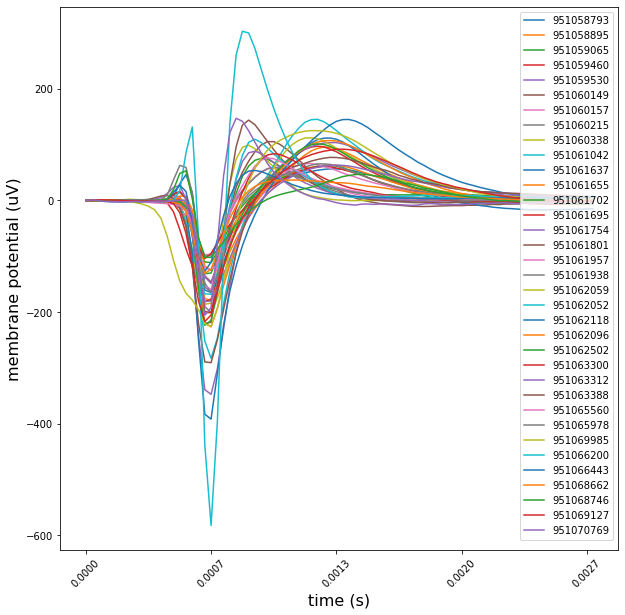

In [67]:
high_snr_unit_ids = session.units[session.units["snr"] > 4].index.values
units_of_interest = high_snr_unit_ids[:35]

waveforms = {uid: session.mean_waveforms[uid] for uid in units_of_interest}
peak_channels = {uid: session.units.loc[uid, 'peak_channel_id'] for uid in units_of_interest}

# plot the mean waveform on each unit's peak channel/
plot_mean_waveforms(waveforms, units_of_interest, peak_channels)
plt.show()

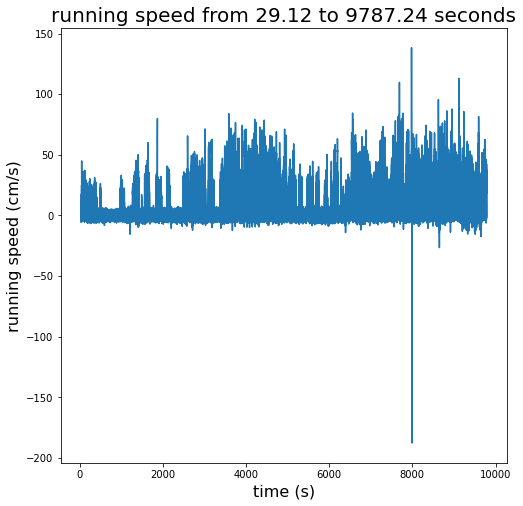

In [70]:
# getting the running speed
running_speed_midpoints = session.running_speed["start_time"] + \
    (session.running_speed["end_time"] - session.running_speed["start_time"]) / 2
plot_running_speed(
    running_speed_midpoints, 
    session.running_speed["velocity"], 
#     start_index=5000,
#     stop_index=5100
)
plt.show()

In [69]:
running_speed_midpoints

0           29.120695
1           29.136870
2           29.170175
3           29.186880
4           29.220240
             ...     
388899    9787.143905
388900    9787.177225
388901    9787.212025
388902    9787.227340
388903    9787.243030
Length: 388904, dtype: float64

In [72]:
session.optogenetic_stimulation_epochs

,start_time,condition,level,stop_time,stimulus_name,duration
id,,,,,,
0,9800.86878,2.5 ms pulses at 10 Hz,1.3,9801.86878,fast_pulses,1.000
1,9802.85894,half-period of a cosine wave,1.7,9803.85894,raised_cosine,1.000
2,9804.72900,a single square pulse,2.0,9804.73900,pulse,0.010
3,9806.76908,2.5 ms pulses at 10 Hz,1.3,9807.76908,fast_pulses,1.000
4,9808.61918,a single square pulse,1.3,9808.62918,pulse,0.010
...,...,...,...,...,...,...
295,10373.25369,a single square pulse,1.7,10373.26369,pulse,0.010
296,10375.25383,a single square pulse,1.7,10375.25883,pulse,0.005
297,10377.06389,half-period of a cosine wave,1.7,10378.06389,raised_cosine,1.000


In [73]:
pupil_data = session.get_pupil_data()
pupil_data

,corneal_reflection_center_x,corneal_reflection_center_y,corneal_reflection_height,corneal_reflection_width,corneal_reflection_phi,pupil_center_x,pupil_center_y,pupil_height,pupil_width,pupil_phi,eye_center_x,eye_center_y,eye_height,eye_width,eye_phi
Time (s),,,,,,,,,,,,,,,
3.19642,315.195530,216.771737,15.228258,14.753248,0.397140,322.838059,171.519408,68.834830,74.728104,-0.025071,304.432640,194.963707,235.544194,305.849526,0.118263
3.22698,315.134054,216.690086,15.894290,15.167013,0.515818,323.102075,171.144225,70.702580,76.162176,-0.077871,305.060657,194.736008,236.257581,306.791696,0.121840
3.24317,315.590042,216.527324,12.762853,13.429345,-0.390412,322.901180,171.658239,71.215809,75.818714,0.126298,305.337688,194.670752,237.026554,305.804897,0.132001
3.27677,315.504906,217.223332,13.549520,14.536822,-0.609003,322.811477,171.886798,71.393805,74.790444,0.139190,304.919767,195.083706,235.943414,306.054632,0.128629
3.31001,315.269718,217.142424,12.773545,13.920805,-0.659214,322.452163,172.001546,71.153255,75.489056,-0.010470,304.562651,195.236574,236.655648,305.818482,0.134018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410.81841,316.019549,214.488080,12.904130,16.689529,-0.056172,332.448394,178.926015,122.982237,153.200665,0.222086,302.786811,193.335069,241.634045,307.223317,0.123965
10410.85140,315.388770,214.261540,12.525488,16.111487,-0.131496,332.258631,177.902990,123.646174,153.060330,0.271755,301.447339,193.248280,242.408591,307.227144,0.125271
10410.88520,315.158601,213.916999,13.190764,16.689277,-0.041867,330.874444,177.105212,123.969870,152.106987,0.316885,300.699148,192.612509,243.218400,306.404017,0.114541


In [75]:
gaze_data = session.get_screen_gaze_data()
gaze_data

,raw_eye_area,raw_pupil_area,raw_screen_coordinates_x_cm,raw_screen_coordinates_y_cm,raw_screen_coordinates_spherical_x_deg,raw_screen_coordinates_spherical_y_deg
Time (s),,,,,,
3.19642,0.058867,0.004563,5.236162,-2.679523,18.966566,-10.129307
3.22698,0.059227,0.004740,5.271450,-2.712756,19.078337,-10.252287
3.24317,0.059229,0.004697,5.191260,-2.645702,18.822196,-10.004051
3.27677,0.059006,0.004571,5.241654,-2.645714,18.991873,-10.004096
3.31001,0.059139,0.004656,5.219199,-2.633003,18.918850,-9.956996
...,...,...,...,...,...,...
10410.81841,0.060660,0.019178,4.306852,-3.559730,15.610050,-13.351645
10410.85140,0.060855,0.019143,4.394574,-3.606416,15.901424,-13.520362
10410.88520,0.060895,0.018906,4.429046,-3.488533,16.046556,-13.093893


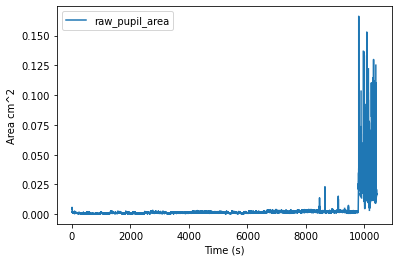

In [76]:
ax = gaze_data[["raw_pupil_area"]].plot()
_ = ax.set_ylabel("Area cm^2")


recordings from male Sst-Cre mice that viewed the Brain Observatory 1.1 stimulus and contain units from area LM,

In [78]:
sessions = cache.get_session_table()
filtered_sessions = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.find('Sst') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISl' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

filtered_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
756029989,2019-10-03T00:00:00Z,734865738,brain_observatory_1.1,96.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,684,2214,6,"[TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS..."


name: the probe name is assigned based on the location of the probe on the recording rig. This is useful to keep in mind because probes with the same name are always targeted to the same cortical region and enter the brain from the same angle (probeA = AM, probeB = PM, probeC = V1, probeD = LM, probeE = AL, probeF = RL). However, the targeting is not always accurate, so the actual recorded region may be different.

In [80]:
# To disable quality metrics:
units = cache.get_units(amplitude_cutoff_maximum = np.inf,
                        presence_ratio_minimum = -np.inf,
                        isi_violations_maximum = np.inf)

print('Total number of units: ' + str(len(units)))

Total number of units: 99180


In [ ]:
for session_id, row in sessions.iterrows():

    truncated_file = True
    directory = os.path.join(data_directory + '/session_' + str(session_id))
    
    while truncated_file:
        session = cache.get_session_data(session_id)
        try:
            print(session.specimen_name)
            truncated_file = False
        except OSError:
            shutil.rmtree(directory)
            print(" Truncated spikes file, re-downloading")

    for probe_id, probe in session.probes.iterrows():
        
        print(' ' + probe.description)
        truncated_lfp = True
        
        while truncated_lfp:
            try:
                lfp = session.get_lfp(probe_id)
                truncated_lfp = False
            except OSError:
                fname = directory + '/probe_' + str(probe_id) + '_lfp.nwb'
                os.remove(fname)
                print("  Truncated LFP file, re-downloading")
            except ValueError:
                print("  LFP file not found.")
                truncated_lfp = False